In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:

image = cv2.imread("./Image.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

In [3]:
def plot_img(img , cmap = "gray"):
    
    
    if cmap != "gray":
        plt.imshow(cv2.cvtColor(img , cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img , cmap)
    plt.xticks([])
    plt.yticks([])

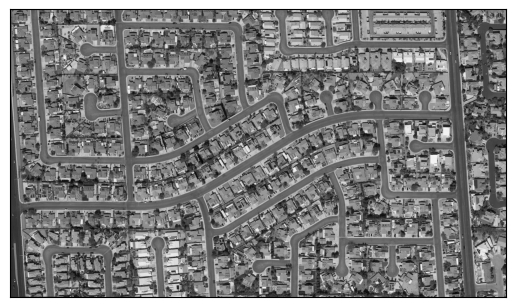

In [4]:
plot_img(gray)

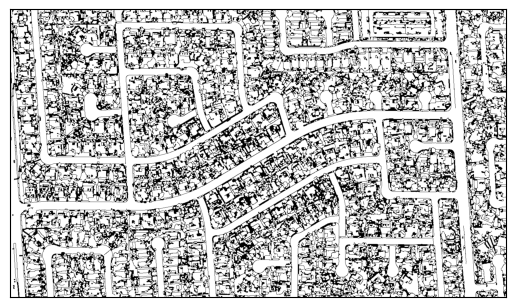

In [5]:
edges = cv2.Canny(blurred, 50, 150)
plot_img(edges)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

_, thresh = cv2.threshold(closed, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plot_img(thresh)

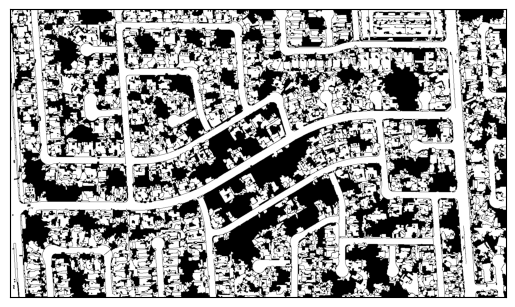

In [6]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)

min_area = 1500
mask = np.zeros_like(thresh, dtype=np.uint8)
for i in range(1, num_labels):
    if stats[i, -1] >= min_area:
        mask[labels == i] = 255
        
plot_img(mask)

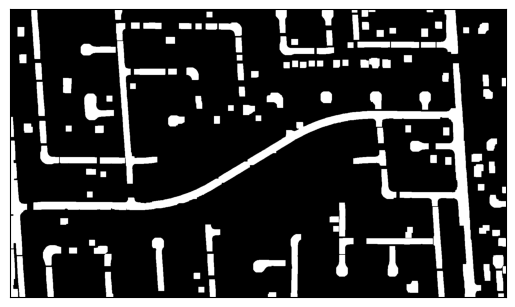

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (19,19))
closed = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

plot_img(closed)

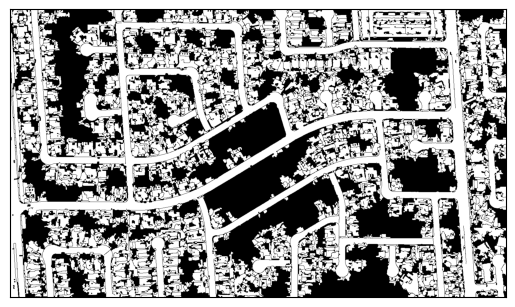

In [8]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

min_area = 150000
mask = np.zeros_like(thresh, dtype=np.uint8)
for i in range(1, num_labels):
    if stats[i, -1] >= min_area:
        mask[labels == i] = 255
        
        
plot_img(mask)

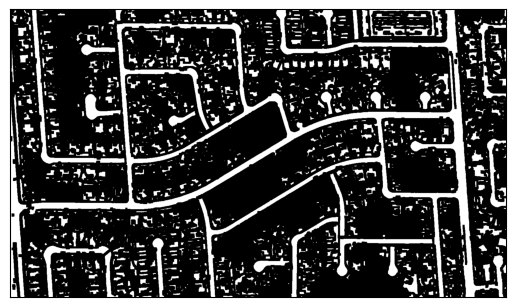

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
eroded =  cv2.erode(mask,kernel,iterations = 1)

plot_img(eroded)

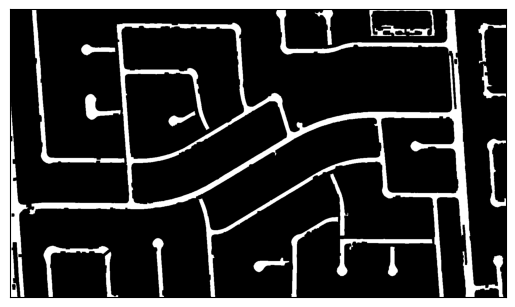

In [10]:
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(eroded, connectivity=8)

min_area = 1500
mask = np.zeros_like(thresh, dtype=np.uint8)
for i in range(1, num_labels):
    if stats[i, -1] >= min_area:
        mask[labels == i] = 255
        
plot_img(mask)

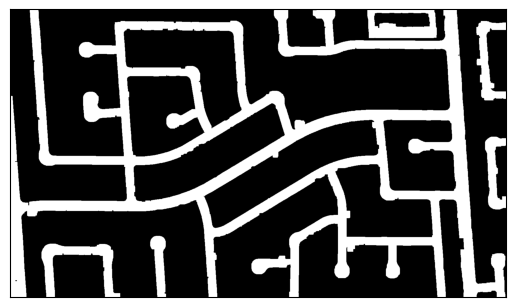

In [11]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
diluted =  cv2.dilate(mask,kernel,iterations = 7)

plot_img(diluted)

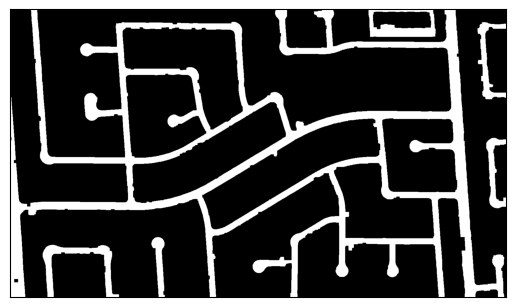

In [12]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
eroded =  cv2.erode(diluted,kernel,iterations = 4)
 
plot_img(eroded)

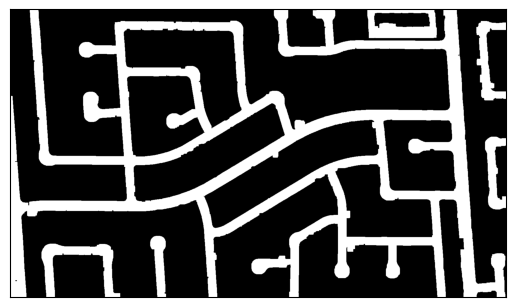

In [13]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
op =  cv2.morphologyEx(diluted , cv2.MORPH_OPEN , kernel)

plot_img(op)

# final output

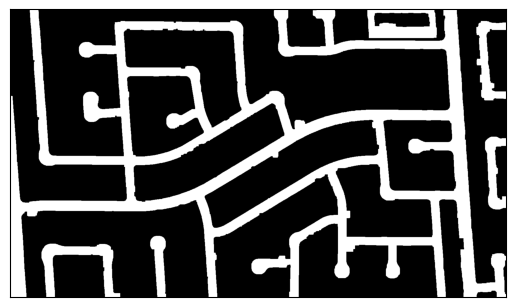

In [14]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kp =  cv2.morphologyEx(op , cv2.MORPH_CLOSE , kernel)

plot_img(kp)

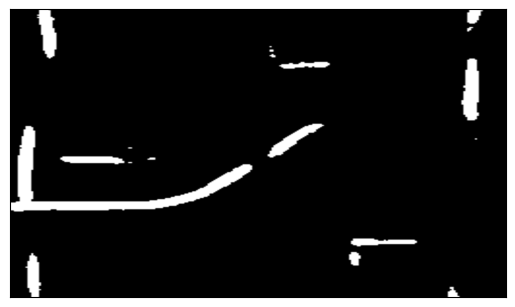

In [15]:
actual = cv2.imread("./Image_mask.png" , cv2.IMREAD_GRAYSCALE)
plot_img(actual)

In [16]:
def calculate_psnr(im1, im2):
    diff = np.subtract(im1, im2)
    squared_diff = np.square(diff)

    mse = np.mean(squared_diff)

    max_pixel = 255
    psnr = 20 * np.log10(max_pixel) - 10 * np.log10(mse)
    
    return psnr

In [17]:
calculate_psnr(actual , kp)

44.5141088151437

In [18]:
import math
def calculate_rmse(im1, im2):
    diff = np.subtract(im1, im2)
    
    h = cv2.calcHist([diff], [0], None, [256], [0, 256])
    
    sq = (value*((idx%256)**2) for idx, value in enumerate(h))
    sum_of_squares = sum(sq)
    rms = math.sqrt(sum_of_squares/float(im1.size * im1.size))
    return rms

In [19]:
calculate_rmse(actual , kp)

0.03337006814062265

In [20]:
from skimage.metrics import structural_similarity

(score, diff) = structural_similarity(actual, kp, full=True)
print("Image similarity", score)

Image similarity 0.671231951162541
